# 6.6 Sourcing & Analyzing Time-Series Data
### This script contains the following:
#### 1. Importing libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Data¶

#### This Data is downloaded from https://ec.europa.eu/eurostat/databrowser/view/TOUR_OCC_MNOR__custom_3522408/default/table?lang=en . It contains monthly data of Net occupancy rate of bed-places and bedrooms in hotels and similar accommodation in Germany from 1990 to 2022(NACE Rev. 2, I, 55.1). 


### 01. Import Libraries and Data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 

In [2]:
# Define Path
path = r'/Users/sudip/Desktop/DATA ANALYST/Projects/Project 6'

In [3]:
# Import Data
data = pd.read_csv(os.path.join(path, 'course_data_exercise', 'tour_occ_mnor__custom_3522403_page_linear.csv'), index_col = False)

In [4]:
data.shape

(391, 9)

In [5]:
data.head()

,DATAFLOW,LAST UPDATE,freq,accomunit,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:TOUR_OCC_MNOR(1.0),20/09/22 23:00:00,M,BEDPL,PC,DE,1990-01,24.5,NaN
1,ESTAT:TOUR_OCC_MNOR(1.0),20/09/22 23:00:00,M,BEDPL,PC,DE,1990-02,29.6,NaN
2,ESTAT:TOUR_OCC_MNOR(1.0),20/09/22 23:00:00,M,BEDPL,PC,DE,1990-03,30.0,NaN
3,ESTAT:TOUR_OCC_MNOR(1.0),20/09/22 23:00:00,M,BEDPL,PC,DE,1990-04,34.4,NaN
4,ESTAT:TOUR_OCC_MNOR(1.0),20/09/22 23:00:00,M,BEDPL,PC,DE,1990-05,43.0,NaN


### 2. Subsetting, wrangling, and cleaning time-series data

#### Create Subset of Data

In [6]:
# removing the irrelevant columns from the data
df = data[['TIME_PERIOD', "OBS_VALUE"]]

In [7]:
df.head()

,TIME_PERIOD,OBS_VALUE
0,1990-01,24.5
1,1990-02,29.6
2,1990-03,30.0
3,1990-04,34.4
4,1990-05,43.0


In [8]:
# renaming the columns name
df = df.rename(columns = {'TIME_PERIOD':'Date', 'OBS_VALUE': 'occ_rate'})

In [9]:
# SET date AS INDEX
data_2 = df.set_index("Date")
data_2.index = pd.to_datetime(data_2.index)
data_2.head()

,occ_rate
Date,
1990-01-01,24.5
1990-02-01,29.6
1990-03-01,30.0
1990-04-01,34.4
1990-05-01,43.0


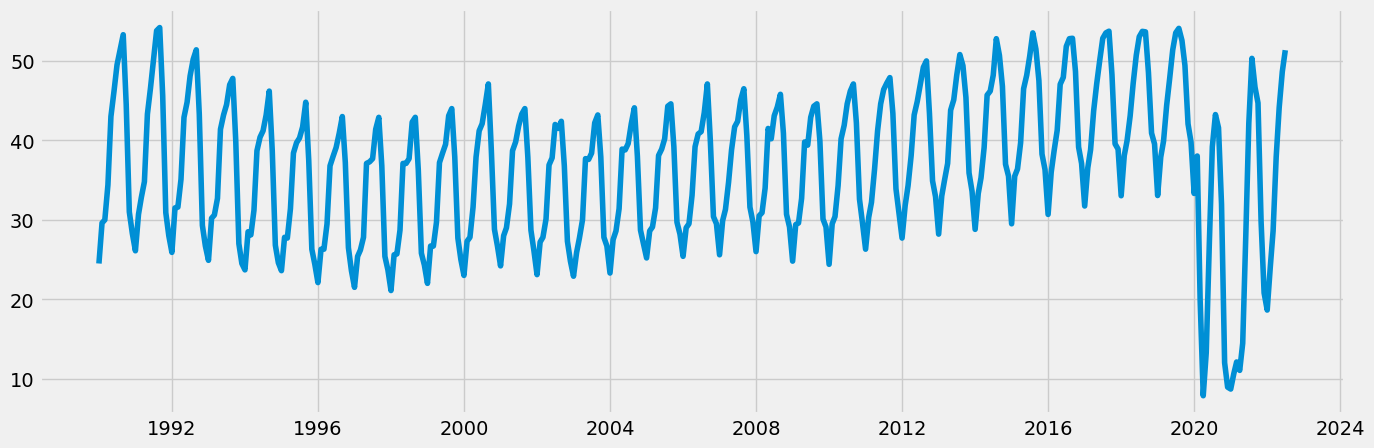

In [10]:
plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here.

plt.plot(data_2)

In [11]:
# Reset index to use the "Date" column as a filter
data_3 = data_2.reset_index()

In [12]:
data_3.head()

,Date,occ_rate
0,1990-01-01,24.5
1,1990-02-01,29.6
2,1990-03-01,30.0
3,1990-04-01,34.4
4,1990-05-01,43.0


In [13]:
# Creating subset of data with relevant time only
data_sub = data_3.loc[(data_3['Date'] >= '2010-01-01') & (data_3['Date'] < '2022-10-01')]

##### Year from 2010 to 2022 is taken for analysis, as Airbnb was founded in 2007 with different name 'Airbed and Breakfast' and during 2009 name was changed to Airbnb and during 2010 app was lunched for instant booking. So we are analysing the net-occupancy of bedrooms and bed places after the lunched of Airbnb. 

In [14]:
data_sub.shape

(151, 2)

In [15]:
data_sub.head()

,Date,occ_rate
240,2010-01-01,24.4
241,2010-02-01,29.5
242,2010-03-01,30.4
243,2010-04-01,34.3
244,2010-05-01,40.2


In [16]:
# set the 'Date' column as the index
from datetime import datetime
data_sub['datetime'] = pd.to_datetime(data_sub['Date'])
data_sub = data_sub.set_index('datetime')
data_sub.drop(['Date'], axis = 1, inplace = True)
data_sub.head()

,occ_rate
datetime,
2010-01-01,24.4
2010-02-01,29.5
2010-03-01,30.4
2010-04-01,34.3
2010-05-01,40.2


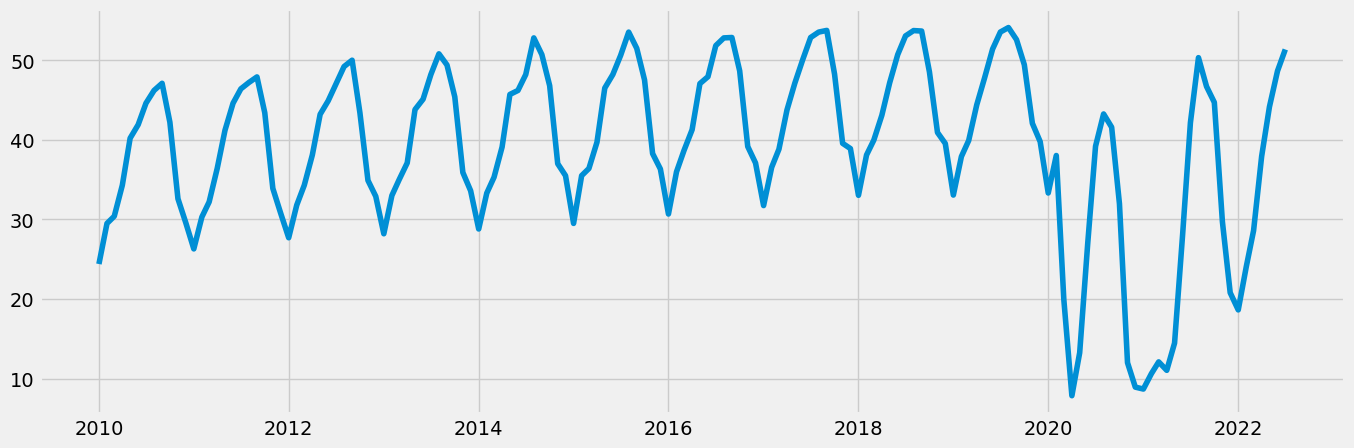

In [17]:
# plot the data
plt.figure(figsize = (15,5), dpi = 100)
plt.plot(data_sub)

#### Missing Values

In [18]:
# Check for missing values (you shouldn't have any)

data_sub.isnull().sum() 

occ_rate    0
dtype: int64

#### Duplicates

In [19]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# 14 dups were found!

14

In [20]:
# Drop Duplicates from the data
data_sub.drop_duplicates(keep=False)

,occ_rate
datetime,
2010-01-01,24.40
2010-03-01,30.40
2010-05-01,40.20
2010-06-01,41.90
2010-10-01,42.20
...,...
2022-03-01,28.60
2022-04-01,37.92
2022-05-01,44.14


In [21]:
data_sub.shape

(151, 1)

### 03. Time-series analysis: decomposition

In [22]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(data_sub, model = 'additive')

In [23]:
from pylab import rcParams # This will define a fixed size for all special charts.
rcParams['figure.figsize'] = 18,7

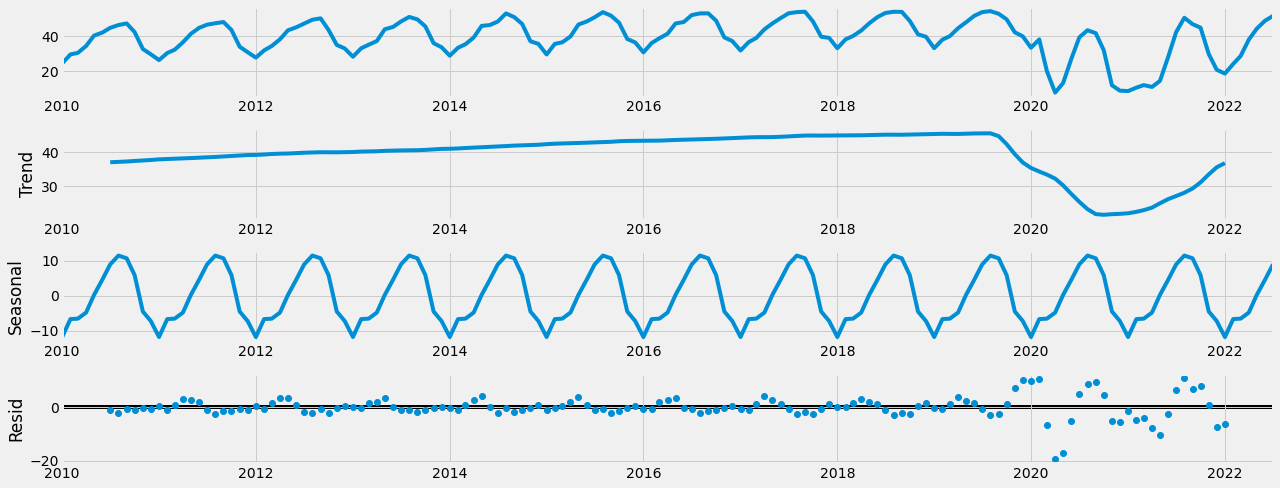

In [24]:
decomposition.plot()
plt.show()

The decomposition clearly shows an upward trend of the net occupancy rate of bed-places and bedrooms in hotels and similar accommodation in Germany from 2010-2020. However, there is a considerable decline in the trend after during 2020 and again increasing during 2021. Since the beginning of the travel restrictions due to COVID-19 in Europe in March 2020, a considerable decline in arrivals of at least 50 percent at tourism establishments across all regions have occured.

The plot shows seasonality due to a pattern repeating itself at the same time each year. Occupancy of bedrooms and bed-places is quite high during the summer season especially July, August and September and starts to gradually decline during the winter season. There is a lowest occupancy rate in January and a highest occupancy rate in August.

There appears to be some noise from due to data fluctuations.

### 04. Stationarity Test

##### a. Dickey-Fuller Test

In [25]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.
from statsmodels.tsa.stattools import adfuller
def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationary Test:')
    test = adfuller(timeseries, autolag ='AIC')
    result = pd.Series(test[0:4], index=['Test Statistics',
                                        'p_value',
                                        'Number of lags Used',
                                        'Number of Observation Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print(result)
    
    # Apply the test using the function on the time series
dickey_fuller(data_sub['occ_rate'])

Dickey-Fuller Stationary Test:
Test Statistics                -2.882453
p_value                         0.047427
Number of lags Used            14.000000
Number of Observation Used    136.000000
Critical Value (1%)            -3.479372
Critical Value (5%)            -2.883037
Critical Value (10%)           -2.578234
dtype: float64


#### H0 = Presence of a unit root (non-stationary)  
#### HA = Unit root present (stationary)  

The test statistic of -2.882453 is slightly larger than the critical value (5%) of -2.883037. As this is not the larger difference in test Statistics and Critical Value(5%) and the p-value is also less than 0.05, we consider this data as stationary. 

##### b. Autocorrelation Test

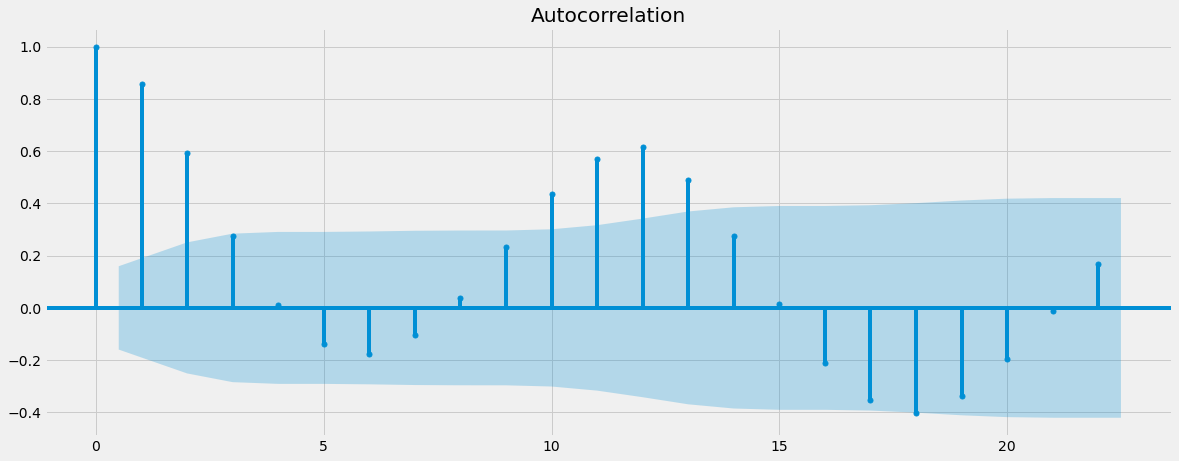

In [26]:
# check out for autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_sub)
plt.show()

The test shows that there are only few vertical lines that go above the blue edge of the confidence interval, indicating that the few lags are significantly correlated with each other.